<a href="https://colab.research.google.com/github/CodingwithArya/PythonCodingSamples/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read in forest fires dataset using pd.read_csv()
forestRaw = pd.read_csv("forestfires.csv")

In [ ]:
#Drop NA values from dataframe
forestRaw.dropna()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Resource: https://www.w3resource.com/pandas/dataframe/dataframe-dropna.php#:~:text=The%20dropna()%20function%20is%20used%20to%20remove%20missing%20values.&text=Determine%20if%20rows%20or%20columns,columns%20which%20contain%20missing%20value.

In [ ]:
# check out contents of the data frame using describe() and head()
print(forestRaw.describe())
print(forestRaw.head())


                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655

Resource: https://www.w3schools.com/python/pandas/ref_df_describe.asp

In [ ]:
# create new column for natural log of (area + 1), called logArea
forestRaw.insert(loc=13,
          column='logArea',
          value=np.log(forestRaw['area']))

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Resource: https://www.geeksforgeeks.org/log-and-natural-logarithmic-value-of-a-column-in-pandas-python/

In [ ]:
# drop factor columns for month & day from data frame
forestRaw = forestRaw.drop(["month", "day", "area"], axis=1)
print(forestRaw.head()) #needed to fix that logArea had many infinity values.

   X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  logArea
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0     -inf
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0     -inf
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0     -inf
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2     -inf
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0     -inf


Resource: https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/

In [ ]:
# build feature data frame and label data frame (one DF of feature columns, and one DF/list of label a.k.a. logArea)
featureForest = forestRaw.filter(['FFMC','DMC','DC','ISI','temp','RH','wind','rain'], axis=1)
labelForest = forestRaw.filter(['logArea'], axis=1)

Resource: https://sparkbyexamples.com/pandas/pandas-create-new-dataframe-by-selecting-specific-columns/
Resource: https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/

In [ ]:
# confirm contents of feature and label data frames
print(featureForest.head())
print(labelForest.head()) #looks like labelForest is returning infinity values

   FFMC   DMC     DC  ISI  temp  RH  wind  rain
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0
   logArea
0     -inf
1     -inf
2     -inf
3     -inf
4     -inf


In [ ]:
# (optional) make correlation plot using seaborn's heatmap


<Axes: xlabel='logArea', ylabel='FFMC'>

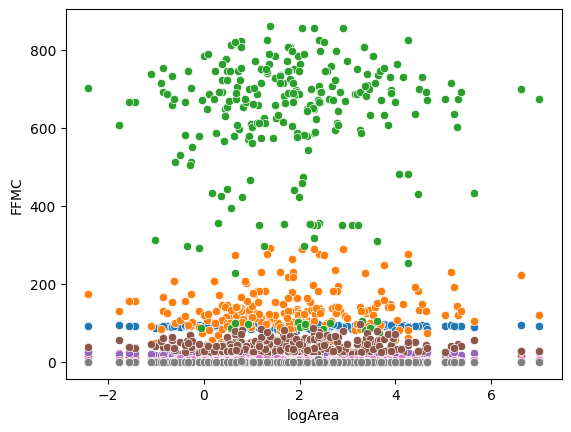

In [ ]:
# plot each feature column vs logArea using a scatterplot (e.g. seaborn's scatterplot)
sns.scatterplot(x=labelForest["logArea"], y=featureForest["FFMC"])

sns.scatterplot(x=labelForest["logArea"], y=featureForest["DMC"])
sns.scatterplot(x=labelForest["logArea"], y=featureForest["DC"])
sns.scatterplot(x=labelForest["logArea"], y=featureForest["ISI"])
sns.scatterplot(x=labelForest["logArea"], y=featureForest["temp"])
sns.scatterplot(x=labelForest["logArea"], y=featureForest["RH"])
sns.scatterplot(x=labelForest["logArea"], y=featureForest["wind"])
sns.scatterplot(x=labelForest["logArea"], y=featureForest["rain"])


Resource: https://stackoverflow.com/questions/54344222/plot-two-pandas-dataframes-in-one-scatter-plot


In [ ]:
# create train/test split of data, 80/20 split
#create a blank plot, and then plot to import
from sklearn.model_selection import train_test_split
featureForest_train, featureForest_test, labelForest_train, labelForest_test = train_test_split(featureForest, labelForest, test_size = 0.2, random_state = 732)
#sns.scatterplot()
#add
print(featureForest_train.head())
print(labelForest_test.head())

     FFMC    DMC     DC   ISI  temp  RH  wind  rain
316  92.4   96.2  739.4   8.6  18.6  24   5.8   0.0
373  94.8  222.4  698.6  13.9  20.3  42   2.7   0.0
501  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8
393  93.4   15.0   25.6  11.4  15.2  19   7.6   0.0
200  91.0  129.5  692.6   7.0  21.6  33   2.2   0.0
      logArea
8        -inf
110      -inf
29       -inf
232  4.638508
241      -inf


In [ ]:
#numpy.nan_to_num(labelForest_test, copy=True, nan=0.0, posinf=None, neginf=None)
forestRaw['logArea'] = np.log(forestRaw['logArea'] + 1)  # Adding 1 to avoid log(0)



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
